# Explore *hrp2* and *hrp3* Deletion Breakpoints

## Introduction

This notebook will create a figure of histidine-rich protein (*hrp*) 2 and *hrp3* deletion breakpoints.

*hrp2* and *hrp3* are genes located in subtelomeric regions of the genome with very high levels of natural variation. Deletion in those genes can cause failure of rapid diagnostic tests and is therefore important to monitor.

Deletion is a genetic event in which a segment of DNA is entirely removed or missing. In this context, 'breakpoints' denote specific locations on the chromosome where such deletions take place.

**This notebook should take approximately two minutes to run.**

## Setup

Install and import the malariagen Python package:

In [1]:
!pip install malariagen_data -q --no-warn-conflicts
import malariagen_data

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 33.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.7/71.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 775.9/775.9 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.9/25.9 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 93.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Import required python libraries that are installed at colab by default.

In [2]:
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
from google.colab import drive

## Access Pf8 Data

We use the malariagen data package to load the release data.

In [3]:
release_data = malariagen_data.Pf8()
df_samples = release_data.sample_metadata()

## *hrp2* & *hrp3* Deletions

We additionally require list of deletion and breakpoint locations within the *hrp2* and *hrp3* across 24,409 QC-pass samples. We can access this data along with other copy-number variation (CNV) calls from [Sanger cloud storage](https://pf8-release.cog.sanger.ac.uk/Pf8_hrp_calls.tsv).

In [4]:
# Read data directly from url
hrp_calls_fn = pd.read_csv('https://pf8-release.cog.sanger.ac.uk/Pf8_cnv_calls.tsv', sep='\t') 

# Print the shape and first rows
print(hrp_calls_fn.shape)
hrp_calls_fn.head()

(24409, 29)


,Sample,CRT_uncurated_coverage_only,CRT_curated_coverage_only,CRT_breakpoint,CRT_faceaway_only,CRT_final_amplification_call,GCH1_uncurated_coverage_only,GCH1_curated_coverage_only,GCH1_breakpoint,GCH1_faceaway_only,...,PM2_PM3_faceaway_only,PM2_PM3_final_amplification_call,HRP2_uncurated_coverage_only,HRP2_breakpoint,HRP2_deletion_type,HRP2_final_deletion_call,HRP3_uncurated_coverage_only,HRP3_breakpoint,HRP3_deletion_type,HRP3_final_deletion_call
0,FP0008-C,0,0,-,-1,0,-1,-1,-,0,...,0,0,0,-,-,0,0,-,-,0
1,FP0009-C,0,0,-,0,0,0,0,-,0,...,0,0,0,-,-,0,0,-,-,0
2,FP0010-CW,-1,-1,-,0,0,-1,-1,-,0,...,0,0,-1,-,-,-1,-1,-,-,-1
3,FP0011-CW,-1,-1,-,-1,-1,-1,-1,-,0,...,0,0,-1,-,-,-1,-1,-,-,-1
4,FP0012-CW,-1,-1,-,0,0,0,0,-,0,...,0,0,-1,-,-,-1,0,-,-,0


Now, let's merge `hrp_calls_fn` with `df_samples` which contains various metadata of Pf8 samples.

In [7]:
# Merge df_samples with hrp_calls_fn
df_samples =  df_samples.merge(hrp_calls_fn, on ='Sample')

## 3D7 Reference Genome Annotation

We would like to know where breakpoints occur in the genome, such as whether they fall within protein-coding regions or mRNA regions.

To facilitate this, we will use the 3D7 reference genome annotation. This data is in a tabular format where each row specifies a genomic feature, such as an exon, mRNA, or protein-coding gene, along with its corresponding coordinates (`start` and `end` columns). For more information about the annotation data format, refer to this [wiki page](https://en.wikipedia.org/wiki/General_feature_format#:~:text=In%20bioinformatics%2C%20the%20general%20feature,.gff%20%2C%20.gff3).

This dataset is available through the malariagen_data package.

In [8]:
df_gff= release_data.genome_features()

# print first rows
df_gff.head()

,contig,source,type,start,end,score,strand,phase,ID,Parent,Name
0,Pf3D7_13_v3,VEuPathDB,protein_coding_gene,624510,626292,NaN,+,NaN,PF3D7_1314600,NaN,LipL1
1,Pf3D7_13_v3,VEuPathDB,mRNA,624510,626292,NaN,+,NaN,PF3D7_1314600.1,PF3D7_1314600,NaN
2,Pf3D7_13_v3,VEuPathDB,exon,624510,626292,NaN,+,NaN,exon_PF3D7_1314600.1-E1,PF3D7_1314600.1,NaN
3,Pf3D7_13_v3,VEuPathDB,CDS,624785,626011,NaN,+,0.0,PF3D7_1314600.1-p1-CDS1,PF3D7_1314600.1,NaN
4,Pf3D7_13_v3,VEuPathDB,five_prime_UTR,624510,624784,NaN,+,NaN,utr_PF3D7_1314600.1_1,PF3D7_1314600.1,NaN


## Figure Preparation

We need to find the start and end positions of chromosomes ('contig' column in the dataframe) to draw gene annotations in the figure that we are going to create.

In [9]:
# Find start and end positions for each chromosome by grouping chromosome coordinates
df_chroms = df_gff.groupby('contig').agg({'start': 'min', 'end': 'max'}).reset_index()
# Set 'chrom' as the index
df_chroms.set_index('contig', inplace=True)
df_chroms

,start,end
contig,,
Pf3D7_01_v3,29510,614893
Pf3D7_02_v3,25232,923648
Pf3D7_03_v3,36965,1038254
Pf3D7_04_v3,28706,1180226
Pf3D7_05_v3,20929,1342964
Pf3D7_06_v3,653,1382627
Pf3D7_07_v3,20307,1426234
Pf3D7_08_v3,21361,1443449
Pf3D7_09_v3,20080,1503336


The next question is: How many samples have deletions in each country?

In [10]:
# This function returns samples with deletion for each country.

def breakpoint_agg(x):
    names = collections.OrderedDict()
    names['Countries'] = ''
    countries = []
    # Loop over each country
    # Count non-zero samples (with deletion)
    for country in x['Country'].unique():
        countries.append(f"{country} ({np.count_nonzero(x['Country'] == country)})")
    # Join together country name and number
    names['Countries'] = ', '.join(countries)
    names['Samples with deletion'] = len(x)
    return pd.Series(names)

We will apply `breakpoint_agg` function to `df_samples` separately for *hrp2* and *hrp3*.

Additionally, we will find genomic coordinates at the edges for mapping in the figure.

In [12]:
# Group samples by Deletion type and HRP3_breakpoint
# Apply breakpoint_agg to count samples with deletion in each country
df_hrp2 = (
    df_samples[
        df_samples['QC pass']
        & ( df_samples['HRP2_final_deletion_call'] == 1 )
    ]
    .assign(Gene='$hrp2$')
    .rename(columns={'HRP2_deletion_type': 'Deletion type'})
    .groupby(['Deletion type', 'HRP2_breakpoint'])
    .apply(breakpoint_agg, include_groups=False)
    .reset_index()
)
# Seperate coordinate value from chromosome
df_hrp2['breakpoint'] = df_hrp2['HRP2_breakpoint'].apply(lambda x: int(x.split(':')[1]))

# Print min and max coordinates
print(f"HRP2 min breakpoint = {df_hrp2['breakpoint'].min()}")
print(f"HRP2 max breakpoint = {df_hrp2['breakpoint'].max()}")
df_hrp2

HRP2 min breakpoint = 1373732
HRP2 max breakpoint = 1374986


,Deletion type,HRP2_breakpoint,Countries,Samples with deletion,breakpoint
0,Telomere healing,Pf3D7_08_v3:1373732,Cambodia (1),1,1373732
1,Telomere healing,Pf3D7_08_v3:1374280,Sudan (1),1,1374280
2,Telomere healing,Pf3D7_08_v3:1374462,Indonesia (5),5,1374462
3,Telomere healing,Pf3D7_08_v3:1374932,Peru (2),2,1374932
4,Telomere healing,Pf3D7_08_v3:1374986,Peru (6),6,1374986


A repeat of the same look-up for *hrp3*.

In [13]:
# Group samples by Deletion type and HRP3_breakpoint
# Apply breakpoint_agg to count samples with deletion in each country
df_hrp3 = (
    df_samples[
        df_samples['QC pass']
        & ( df_samples['HRP3_final_deletion_call'] == 1 )
    ]
    .rename(columns={'HRP3_deletion_type': 'Deletion type'})
    .groupby(['Deletion type', 'HRP3_breakpoint'])
    .apply(breakpoint_agg, include_groups=False)
    .reset_index()
)
# Seperate coordinate value from chromosome
df_hrp3['breakpoint'] = df_hrp3['HRP3_breakpoint'].apply(lambda x: x.split(':')[1])

# Print min and max coordinates
print(f"HRP3 min breakpoint = {df_hrp3['breakpoint'].min()}")
print(f"HRP3 max breakpoint = {df_hrp3['breakpoint'].max()}")
df_hrp3

HRP3 min breakpoint = 2800004-2807159
HRP3 max breakpoint = 2841120


,Deletion type,HRP3_breakpoint,Countries,Samples with deletion,breakpoint
0,Chromosome 11 recombination,Pf3D7_13_v3:2800004-2807159,"Thailand (1), Ghana (3), Indonesia (38), Peru ...",162,2800004-2807159
1,Chromosome 5 recombination,Pf3D7_13_v3:2835587-2835612,"Cambodia (20), Vietnam (1)",21,2835587-2835612
2,Telomere healing,Pf3D7_13_v3:2811525,India (1),1,2811525
3,Telomere healing,Pf3D7_13_v3:2812344,Sudan (1),1,2812344
4,Telomere healing,Pf3D7_13_v3:2815249,Tanzania (1),1,2815249
5,Telomere healing,Pf3D7_13_v3:2822480,Ghana (1),1,2822480
6,Telomere healing,Pf3D7_13_v3:2823645,Kenya (1),1,2823645
7,Telomere healing,Pf3D7_13_v3:2830952,Cambodia (7),7,2830952
8,Telomere healing,Pf3D7_13_v3:2834604,Vietnam (1),1,2834604
9,Telomere healing,Pf3D7_13_v3:2835532,Thailand (1),1,2835532


It seems that Chromosome 11 recombination breakpoints are observed in multiple countries which motivates us to print the full list of countries.

In [14]:
# Locate the first row by using the index
df_hrp3.iloc[0]['Countries']

'Thailand (1), Ghana (3), Indonesia (38), Peru (15), Bangladesh (1), Vietnam (2), Colombia (50), Ethiopia (9), Senegal (6), Laos (19), Cambodia (3), Sudan (6), Mali (1), Gambia (7), Kenya (1)'

Given the fact that many of these events result in the deletion of other genes in addition to *hrp2* and *hrp3*.

We could have a look at which genes are present within the range of breakpoints before including them in the plot.

In [15]:
# Genes in hrp2 breakpoints
df_gff.loc[
    ( df_gff['contig'] == 'Pf3D7_08_v3' )
    & ( df_gff['start'] <= 1375500 )
    & ( df_gff['end'] >= 1364000 )
]

,contig,source,type,start,end,score,strand,phase,ID,Parent,Name
17090,Pf3D7_08_v3,VEuPathDB,protein_coding_gene,1373212,1376988,NaN,-,NaN,PF3D7_0831800,NaN,HRP2
17091,Pf3D7_08_v3,VEuPathDB,mRNA,1373212,1376988,NaN,-,NaN,PF3D7_0831800.1,PF3D7_0831800,NaN
17092,Pf3D7_08_v3,VEuPathDB,exon,1373212,1375084,NaN,-,NaN,exon_PF3D7_0831800.1-E2,PF3D7_0831800.1,NaN
17093,Pf3D7_08_v3,VEuPathDB,exon,1375231,1376988,NaN,-,NaN,exon_PF3D7_0831800.1-E1,PF3D7_0831800.1,NaN
17094,Pf3D7_08_v3,VEuPathDB,CDS,1374236,1375084,NaN,-,0.0,PF3D7_0831800.1-p1-CDS2,PF3D7_0831800.1,NaN
17095,Pf3D7_08_v3,VEuPathDB,CDS,1375231,1375299,NaN,-,0.0,PF3D7_0831800.1-p1-CDS1,PF3D7_0831800.1,NaN
17096,Pf3D7_08_v3,VEuPathDB,three_prime_UTR,1373212,1374235,NaN,-,NaN,utr_PF3D7_0831800.1_1,PF3D7_0831800.1,NaN
17097,Pf3D7_08_v3,VEuPathDB,five_prime_UTR,1375300,1376988,NaN,-,NaN,utr_PF3D7_0831800.1_2,PF3D7_0831800.1,NaN
27865,Pf3D7_08_v3,VEuPathDB,protein_coding_gene,1364640,1369862,NaN,-,NaN,PF3D7_0831700,NaN,HSP70x
27866,Pf3D7_08_v3,VEuPathDB,mRNA,1364640,1369862,NaN,-,NaN,PF3D7_0831700.1,PF3D7_0831700,NaN


In [16]:
# Genes in hrp3 breakpoints
pd.options.display.max_rows = 100
df_gff.loc[
    ( df_gff['contig'] == 'Pf3D7_13_v3' )
    & ( df_gff['start'] <= 2845000 )
    & ( df_gff['end'] >= 2795000 )
]

,contig,source,type,start,end,score,strand,phase,ID,Parent,Name
17986,Pf3D7_13_v3,VEuPathDB,pseudogene,2811706,2820270,NaN,+,NaN,PF3D7_1371600,NaN,EBL1
17987,Pf3D7_13_v3,VEuPathDB,pseudogenic_transcript,2811706,2820270,NaN,+,NaN,PF3D7_1371600.1,PF3D7_1371600,NaN
17988,Pf3D7_13_v3,VEuPathDB,exon,2811706,2812263,NaN,+,NaN,exon_PF3D7_1371600.1-E1,PF3D7_1371600.1,NaN
17989,Pf3D7_13_v3,VEuPathDB,exon,2812266,2819628,NaN,+,NaN,exon_PF3D7_1371600.1-E2,PF3D7_1371600.1,NaN
17990,Pf3D7_13_v3,VEuPathDB,exon,2819764,2819851,NaN,+,NaN,exon_PF3D7_1371600.1-E3,PF3D7_1371600.1,NaN
17991,Pf3D7_13_v3,VEuPathDB,exon,2820015,2820088,NaN,+,NaN,exon_PF3D7_1371600.1-E4,PF3D7_1371600.1,NaN
17992,Pf3D7_13_v3,VEuPathDB,exon,2820227,2820270,NaN,+,NaN,exon_PF3D7_1371600.1-E5,PF3D7_1371600.1,NaN
17993,Pf3D7_13_v3,VEuPathDB,CDS,2811706,2812263,NaN,+,0.0,PF3D7_1371600.1-p1-CDS1,PF3D7_1371600.1,NaN
17994,Pf3D7_13_v3,VEuPathDB,CDS,2812266,2815526,NaN,+,0.0,PF3D7_1371600.1-p1-CDS2,PF3D7_1371600.1,NaN
17995,Pf3D7_13_v3,VEuPathDB,three_prime_UTR,2815527,2819628,NaN,+,NaN,utr_PF3D7_1371600.1_1,PF3D7_1371600.1,NaN


## Create Figure

This intricate figure serves to map deletion breakpoints in *hrp2* and *hrp3* across various countries. The x-axis of the figure displays the deletion breakpoints, while the y-axis shows the countries along with the number of breakpoints they exhibit.

The figure comprises two sections: *hrp2* (positioned at the top, subplots 1-5) and *hrp3* (located at the bottom, subplots 6-12), consisting of a total of 12 subplots.


We start by defining distinct colour codes for each genomic region that we will annotate.

In [17]:
# Create a dictionary with distinct colour codes
figure_colours = collections.OrderedDict()
figure_colours['chr_8_13'] = '#377eb8'
figure_colours['chr_11'] = '#984ea3'
figure_colours['chr_5'] = '#ff7f00'
figure_colours['similar_sequence'] = '#ffff33'
figure_colours['hrp_genes'] = '#e41a1c'
figure_colours['rrna_genes'] = '#4daf4a'
figure_colours['other_genes'] = 'black'
figure_colours['pseudogenes'] = 'grey'

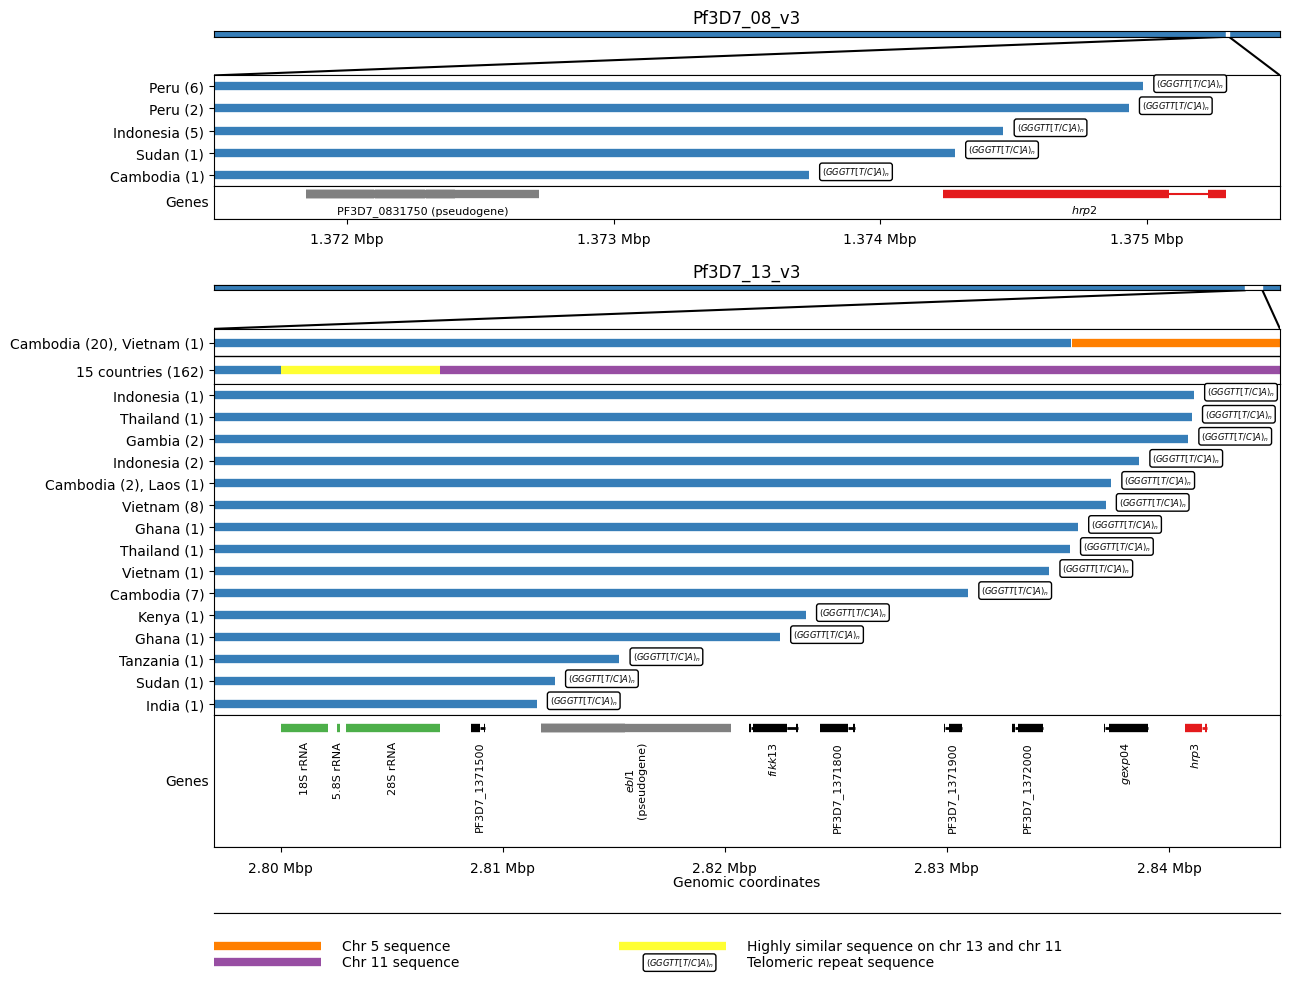

In [18]:
# Full figure

# The figure will consist of 12 subplots, each with varying sizes.
fig, axs = plt.subplots(12, 1, figsize=(13, 10), gridspec_kw={'height_ratios': [1, 7, 20, 6, 12, 1, 7, 10, 60, 24, 12, 12], 'hspace': 0})

### HRP2 (upper panel)

# Set the minimum and maximum positions for hrp2

min_pos = 1371500
max_pos = 1375500

## Subplot 1: Chromosome Title and Region

# Set the title
axs[0].set_title('Pf3D7_08_v3')
# Don't display other properties here
axs[0].set_xticks([])
axs[0].set_xlabel(None)
axs[0].set_yticks([])
axs[0].set_xlim(int(df_chroms.loc['Pf3D7_08_v3', 'start']), int(df_chroms.loc['Pf3D7_08_v3', 'end']))
axs[0].set_facecolor(figure_colours['chr_8_13'])
axs[0].axvspan(min_pos, max_pos, color='white')

## Subplot 2: Chromosome Boundaries

axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_xlim(int(df_chroms.loc['Pf3D7_08_v3', 'start']), int(df_chroms.loc['Pf3D7_08_v3', 'end']))
axs[1].set_ylim(0, 1)
axs[1].plot([int(df_chroms.loc['Pf3D7_08_v3', 'start']), min_pos], [0, 1], '-', color='black')
axs[1].plot([int(df_chroms.loc['Pf3D7_08_v3', 'end']), max_pos], [0, 1], '-', color='black')
axs[1].spines['left'].set_visible(False)
axs[1].spines['right'].set_visible(False)

# Subplot 3: Deletion Breakpoints by Country

# Create lists for y-axis labels and positions
ylabels = []
yposes = []
for ypos, row in df_hrp2.sort_values('breakpoint', ascending=False).iterrows():
    yposes.append(ypos)
    axs[2].plot((min_pos, row['breakpoint']), (ypos, ypos), linewidth=6, solid_capstyle='butt', color=figure_colours['chr_8_13'])
    axs[2].text(row['breakpoint'] + 50, ypos , '$(GGGTT[T/C]A)_n$', fontsize=6, ha='left', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
    ylabels.append(f"{row['Countries']}")

axs[2].set_yticks(yposes)
axs[2].set_yticklabels(ylabels)
axs[2].set_xlim(min_pos, max_pos)
axs[2].set_ylim(min(yposes)-0.5, max(yposes)+0.5)
axs[2].set_xticks([])

## Subplot 4: Genes on the x-axis

axs[3].set_xlim(min_pos, max_pos)
axs[3].set_ylim(0, 1)

for ix, row in df_gff.loc[
    ( df_gff['contig'] == 'Pf3D7_08_v3' )
    & ( df_gff['start'] <= max_pos )
    & ( df_gff['end'] >= min_pos )
    & ( df_gff['type'] == 'CDS' )
].iterrows():
    if row['start'] >= 1373212 and row['end'] <= 1376988:
        color=figure_colours['hrp_genes']
    else:
        color=figure_colours['other_genes']
    axs[3].plot((row['start'], row['end']), (0.75, 0.75), linewidth=6, solid_capstyle='butt', color=color)

for ix, row in df_gff.loc[
    ( df_gff['contig'] == 'Pf3D7_08_v3' )
    & ( df_gff['start'] <= max_pos )
    & ( df_gff['end'] >= min_pos )
    & ( df_gff['type'] == 'pseudogene' )
].iterrows():
    axs[3].plot((row['start'], row['end']), (0.75, 0.75), linewidth=6, solid_capstyle='butt', color=figure_colours['pseudogenes'])

# Add gene names for hrp2 panel
axs[3].text(( 1375299 + 1374236 ) / 2, 0.25, '${hrp2}$', va='center', ha='center', size=8)
axs[3].text(( 1371847 + 1372720 ) / 2, 0.25, 'PF3D7_0831750 (pseudogene)', va='center', ha='center', size=8)
axs[3].set_yticks([])
axs[3].set_xticks([])
axs[3].set_ylabel('Genes', rotation=0, ha='right', va='center')
# Add a connection line for the gene
axs[3].plot((1_375_084, 1_375_231), (0.75, 0.75), c = figure_colours['hrp_genes'])

## Subplot 5: Ticks for Genomic Coordinates
# Set the x-axis limits to cover the specified genomic region between 'min_pos' and 'max_pos'
axs[4].set_xlim(min_pos, max_pos)
# Hide the left and right spines to create a cleaner appearance
axs[4].spines['left'].set_visible(False)
axs[4].spines['right'].set_visible(False)
# Configure the x-axis ticks at specific positions
axs[4].set_xticks([1372000, 1373000, 1374000, 1375000])
# Label the x-axis ticks with corresponding values
axs[4].set_xticklabels(["1.372 Mbp", "1.373 Mbp", "1.374 Mbp", "1.375 Mbp"])
# Remove y-axis ticks to maintain a clean look
axs[4].set_yticks([])
# Position x-axis ticks at the top
axs[4].xaxis.tick_top()
# Adjust the direction of x-axis ticks and add padding
axs[4].tick_params(axis="x", direction="in", pad=-20)

### HRP3

# Set the minimum and maximum positions for hrp3
min_pos = 2797000
max_pos = 2845000

## Subplot 6: Chromosome Name as Title and
# Set the title
axs[5].set_title('Pf3D7_13_v3')
axs[5].set_xticks([])
axs[5].set_xlabel(None)
axs[5].set_yticks([])
axs[5].set_xlim(int(df_chroms.loc['Pf3D7_13_v3', 'start']), int(df_chroms.loc['Pf3D7_13_v3', 'end']))
axs[5].set_facecolor(figure_colours['chr_8_13'])
axs[5].axvspan(min_pos, max_pos, color='white')

## Subplot 7: Chromosome Boundaries
axs[6].set_xticks([])
axs[6].set_yticks([])
# Set the x-axis limits to cover the specified genomic region between the start and end positions of 'Pf3D7_13_v3'
axs[6].set_xlim(int(df_chroms.loc['Pf3D7_13_v3', 'start']), int(df_chroms.loc['Pf3D7_13_v3', 'end']))
axs[6].set_ylim(0, 1) # y-axis will only have one annotation
# Create lines to mark the start and end positions of the chromosome region with black color
axs[6].plot([int(df_chroms.loc['Pf3D7_13_v3', 'start']), min_pos], [0, 1], '-', color='black')
axs[6].plot([int(df_chroms.loc['Pf3D7_13_v3', 'end']), max_pos], [0, 1], '-', color='black')
# Hide the left and right spines to create a cleaner appearance
axs[6].spines['left'].set_visible(False)
axs[6].spines['right'].set_visible(False)


## Subplot 8 and 9: Deletion Breakpoints by Country

# Initialize lists for labels and positions
ylabels_7 = []
yposes_7 = []
ylabels_8 = []
yposes_8 = []

# How many countries have Chromosome 11 recombination breakpoints?
multicountry_label = f'{len(df_hrp3.iloc[0]["Countries"].split(","))} countries ({df_hrp3.iloc[0]["Samples with deletion"]})'

# Iterate through df_hrp3 sorted by breakpoints
for ypos, row in df_hrp3.sort_values('breakpoint', ascending=True).iterrows():

    # Check the deletion type and apply different plotting styles accordingly
    # Telomere healing
    if row['Deletion type'] == 'Telomere healing':
        breakpoint = int(row['breakpoint'])
        axs[8].plot((min_pos, breakpoint), (ypos, ypos), linewidth=6, solid_capstyle='butt', color=figure_colours['chr_8_13'])
        axs[8].text(breakpoint + 600, ypos , '$(GGGTT[T/C]A)_n$', fontsize=6, ha='left', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
        ylabels_8.append(f"{row['Countries']}")
        yposes_8.append(ypos)

    # Chromosome 5 recombination
    if row['Deletion type'] == 'Chromosome 5 recombination':
        breakpoint_start, breakpoint_end = [int(x) for x in row['breakpoint'].split('-')]
        axs[7].plot((min_pos, breakpoint_start), (ypos, ypos), linewidth=6, solid_capstyle='butt', color=figure_colours['chr_8_13'])
        axs[7].plot((breakpoint_end, max_pos), (ypos, ypos), linewidth=6, solid_capstyle='butt', color=figure_colours['chr_5'])
        ylabels_7.append(f"{row['Countries']}")
        yposes_7.append(ypos)

    # Chromosome 11 recombination
    if row['Deletion type'] == 'Chromosome 11 recombination':
        breakpoint_start, breakpoint_end = [int(x) for x in row['breakpoint'].split('-')]
        axs[7].plot((min_pos, breakpoint_start), (ypos, ypos), linewidth=6, solid_capstyle='butt', color=figure_colours['chr_8_13'])
        axs[7].plot((breakpoint_end, max_pos), (ypos, ypos), linewidth=6, solid_capstyle='butt', color=figure_colours['chr_11'])
        axs[7].plot((breakpoint_start, breakpoint_end), (ypos, ypos), linewidth=6, solid_capstyle='butt', color=figure_colours['similar_sequence'])
        yposes_7.append(ypos)
        ylabels_7.append(multicountry_label)

# Add a line to seperate Chrom 5 and 11, this may need to be adjusted manually in the future
axs[7].axhline(y=max(yposes_7)-0.5, color='black', linestyle='-', linewidth=1)

# Set the ticks and labels for Subplot 8
axs[7].set_yticks(yposes_7)
axs[7].set_yticklabels(ylabels_7)
axs[7].set_ylim(min(yposes_7)-0.5, max(yposes_7)+0.5)
axs[7].set_xlim(min_pos, max_pos)
axs[7].set_xticks([])

# Set the ticks and labels for Subplot 9
axs[8].set_yticks(yposes_8)  # Ensure yposes_8 has the same length as ylabels_8
axs[8].set_yticklabels(ylabels_8)  # Ensure the number of labels matches the number of ticks
axs[8].set_xlim(min_pos, max_pos)
axs[8].set_ylim(min(yposes_8)-0.5, max(yposes_8)+0.5)  # Use yposes_8 for ylim
axs[8].set_xticks([])

## Subplot 10: Gene annotations on the x-axis

bar_pos = 0.9
text_pos = 0.8

# Set the x-axis and y-axis limits
axs[9].set_xlim(min_pos, max_pos)
axs[9].set_ylim(0, 1)

# Group CDS regions and draw connection lines by using proximity of breakpoints.
# Previously we were using polypeptide type to draw connection lines, but this does not exist in the new GFF
prev_end = None
connections = []
for ix, row in df_gff.loc[
    ( df_gff['contig'] == 'Pf3D7_13_v3' )
    & ( df_gff['start'] <= max_pos )
    & ( df_gff['end'] >= min_pos )
    & ( df_gff['type'] == 'CDS' )
].iterrows():
    if row['start'] >= 2840727 and row['end'] <= 2841703:
        color=figure_colours['hrp_genes']
    else:
        color=figure_colours['other_genes']
    #print(row.id)
    axs[9].plot((row['start'], row['end']), (bar_pos, bar_pos), linewidth=6, solid_capstyle='butt', color=color)

    if prev_end and (row['start'] - prev_end) <= 500 and (row['start'] - prev_end) > 0:
        connections.append((prev_end, row['end'], color))
    prev_end = row['end']

# Plot connection lines between breakpoints that are in same CDS region and within 500 base-diameter
# These lines will be thinner, so lw=2
for start, end, color in connections:
    axs[9].plot((start, end), (bar_pos, bar_pos), linewidth=2, color=color, solid_capstyle='butt')

# Plot rRNA annotations
for ix, row in df_gff.loc[
    ( df_gff['contig'] == 'Pf3D7_13_v3' )
    & ( df_gff['start'] <= max_pos )
    & ( df_gff['end'] >= min_pos )
    & ( df_gff['type'] == 'rRNA' )
].iterrows():
    axs[9].plot((row['start'], row['end']), (bar_pos, bar_pos), linewidth=6, solid_capstyle='butt', color=figure_colours['rrna_genes'])

# Plot pseudogene annotations
for ix, row in df_gff.loc[
    ( df_gff['contig'] == 'Pf3D7_13_v3' )
    & ( df_gff['start'] <= max_pos )
    & ( df_gff['end'] >= min_pos )
    & ( df_gff['type'] == 'pseudogene' )
].iterrows():
    axs[9].plot((row['start'], row['end']), (bar_pos, bar_pos), linewidth=6, solid_capstyle='butt', color=figure_colours['pseudogenes'])

# Annotate specific gene positions with labels
axs[9].text(( 2800004 + 2802154 ) / 2, text_pos, '18S rRNA', va='top', ha='center', size=8, rotation=90)
axs[9].text(( 2802527 + 2802686 ) / 2, text_pos, '5.8S rRNA', va='top', ha='center', size=8, rotation=90)
axs[9].text(( 2802945 + 2807159 ) / 2, text_pos, '28S rRNA', va='top', ha='center', size=8, rotation=90)
axs[9].text(( 2808200 + 2809700 ) / 2, text_pos, 'PF3D7_1371500', va='top', ha='center', size=8, rotation=90)
axs[9].text(( 2811706 + 2820270 ) / 2, text_pos, '${ebl1}$\n(pseudogene)', va='top', ha='center', size=8, rotation=90)
axs[9].text(( 2821078 + 2823292 ) / 2, text_pos, '${fikk13}$', va='top', ha='center', size=8, rotation=90)
axs[9].text(( 2824302 + 2825852 ) / 2, text_pos, 'PF3D7_1371800', va='top', ha='center', size=8, rotation=90)
axs[9].text(( 2829856 + 2830669 ) / 2, text_pos, 'PF3D7_1371900', va='top', ha='center', size=8, rotation=90)
axs[9].text(( 2832952 + 2834322 ) / 2, text_pos, 'PF3D7_1372000', va='top', ha='center', size=8, rotation=90)
axs[9].text(( 2837053 + 2839058 ) / 2, text_pos, '${gexp04}$', va='top', ha='center', size=8, rotation=90)
axs[9].text(( 2840727 + 2841703 ) / 2, text_pos, '${hrp3}$', va='top', ha='center', size=8, rotation=90)
# Set y-axis ticks, customize x-axis labels, and add x-axis label and y-axis label
axs[9].set_xlabel('Genomic coordinates')
axs[9].set_ylabel('Genes', rotation=0, ha='right', va='center')
axs[9].set_yticks([])

## Subplot 11: Ticks (x-axis) for Genomic Coordinates
# Hide left, right, and bottom spines
axs[10].set_xlim(min_pos, max_pos)
axs[10].spines['left'].set_visible(False)
axs[10].spines['right'].set_visible(False)
axs[10].set_xticks([2800000, 2810000, 2820000, 2830000, 2840000])
axs[10].set_xticklabels(["2.80 Mbp", "2.81 Mbp", "2.82 Mbp", "2.83 Mbp", "2.84 Mbp"])
axs[10].set_yticks([])
axs[10].xaxis.tick_top()
axs[10].tick_params(axis="x", direction="in", pad=-20)
axs[10].text((min_pos + max_pos) / 2, 0.4, 'Genomic coordinates', ha='center')

## Subplot 12: Legend
# Hide left, right, and bottom spines
axs[11].spines['left'].set_visible(False)
axs[11].spines['right'].set_visible(False)
axs[11].spines['bottom'].set_visible(False)
# Hide both x and y-axis ticks
axs[11].set_xticks([])
axs[11].set_yticks([])
# Create legend elements with color bars and labels
axs[11].plot((0, 0.1), (0.5, 0.5), linewidth=6, solid_capstyle='butt', color=figure_colours['chr_5'])
axs[11].text(0.12, 0.5, 'Chr 5 sequence', va='center')
axs[11].plot((0, 0.1), (0.25, 0.25), linewidth=6, solid_capstyle='butt', color=figure_colours['chr_11'])
axs[11].text(0.12, 0.25, 'Chr 11 sequence', va='center')
axs[11].plot((0.38, 0.48), (0.5, 0.5), linewidth=6, solid_capstyle='butt', color=figure_colours['similar_sequence'])
axs[11].text(0.50, 0.5, 'Highly similar sequence on chr 13 and chr 11', va='center')
axs[11].text(.405, .206, '$(GGGTT[T/C]A)_n$', fontsize=6, ha='left', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
axs[11].text(0.50, 0.25, 'Telomeric repeat sequence', va='center')
# Set the limits for this subplot
axs[11].set_xlim(0, 1)
axs[11].set_ylim(0, 1)

# Ensure the figure layout is tidy
fig.tight_layout()

**Figure Legend: *hrp2* and *hrp3* deletion breakpoints.** We see five different breakpoints resulting in the deletion of *hrp2*. Four of these are within exon 2 of the gene whereas the fifth is found between *hrp2* and the pseudogene PF3D7_0831750. For all five events we see evidence of telomeric healing from reads that contain part Pf3D7_08_v3 sequence and part telomeric repeat sequence (GGGTTCA/GGGTTTA). We see 17 different breakpoints resulting in the deletion of hrp3. For 15 of these we see evidence of telomeric healing. Note that many of these events result in the deletion of other genes in addition to *hrp3*. For twenty samples from Cambodia and a single sample from Vietnam we see evidence of a recombination with chromosome 5 which results in a hybrid chromosome comprising mostly chromosome 13 sequence but a small inverted section of an internal portion of chromosome 5 containing the gene *mdr1*. We also see evidence of a recombination with chromosome 11 which results in a hybrid chromosome comprising mostly chromosome 13 sequence but also a section of the 3’ end of chromosome 11. This is the most common deletion type, being seen in 162 samples from 15 different countries. Because the recombination occurs between highly similar sequences of a set of three orthologous ribosomal RNA genes found on both chromosomes, it is not possible to identify the exact breakpoints.

### Save Figure

In [ ]:
# You will need to authorise Google Colab access to Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# This will send the file to your Google Drive, where you can download it from if needed
# Change the file path if you wish to send the file to a specific location
# Change the file name if you wish to call it something else

fig.savefig('/content/drive/My Drive/HRP_Deletions_Figure.pdf')
fig.savefig('/content/drive/My Drive/HRP_Deletions_Figure.png', dpi=480) # increase the dpi for higher resolution